## Welcome to Our Session on **Customer Segmentation using K-Means Clustering**

Today, we dive into one of the most practical and widely adopted techniques in **unsupervised machine learning** — **K-Means Clustering** — applied to a real-world business scenario: **Customer Segmentation**.


### What is Customer Segmentation?

**Customer segmentation** is the process of categorizing customers into distinct groups based on shared characteristics such as age, gender, income level, and purchasing behavior. This allows businesses to:
- Deliver personalized marketing campaigns  
- Enhance customer experience  
- Boost engagement and retention  
- Make data-driven strategic decisions  

### What Will You Learn in This Session?

Using the **Mall Customer Segmentation Dataset**, we'll walk through a complete machine learning pipeline, focusing on practical insights and implementation:

1. **Exploratory Data Analysis (EDA)**  
   Gain a deep understanding of the dataset through visualization and summary statistics to uncover hidden patterns and relationships.

2. **Clustering with the K-Means Algorithm**  
   Implement K-Means to group customers based on **Annual Income** and **Spending Score**. We'll also explore how to choose the optimal number of clusters using the **Elbow Method**.

3. **Visualizing Results**  
   Plot the customer clusters to understand group characteristics and discuss how businesses might target these segments.

---

## About the Dataset

### Context  
This dataset was curated for educational purposes to demonstrate the concept of **customer segmentation**, commonly used in **market basket analysis**. We'll be using **K-Means Clustering**, an unsupervised learning algorithm, to uncover customer groups.

### Dataset Features  
The dataset simulates a **supermarket mall's** customer base, obtained through membership data. It includes the following attributes:
- `CustomerID`
- `Gender`
- `Age`
- `Annual Income (k$)`
- `Spending Score (1–100)` — a score assigned based on behavior and purchasing data

### Problem Statement  
As the mall owner, you want to understand your customers better — particularly, to identify high-value or target customer groups to assist your **marketing team** in crafting more effective strategies.

### Acknowledgements  
This dataset and its concept were inspired by the [Machine Learning A–Z™ course on Udemy](https://github.com/SteffiPeTaffy/machineLearningAZ), aimed at making clustering accessible to beginners.

### By the end of this session, you’ll be able to:
1. Perform customer segmentation using **K-Means Clustering** in Python  
2. Identify your **target customers** for effective marketing strategies  
3. Understand how clustering applies to real-world business decision-making

---

# **Mall Customer Segmentation using K-Means Clustering**


In [5]:
# Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set_style('whitegrid')

## Load the Data


In [6]:
# Load dataset
df = pd.read_csv("Mall Customer Segmentation Data.csv")

# Display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA (Exploratory Data Analysis)


In [7]:
# Shape of dataset
print("Dataset shape:", df.shape)


Dataset shape: (200, 5)


In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Summary stats
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Missing Values


In [10]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Gender Distribution


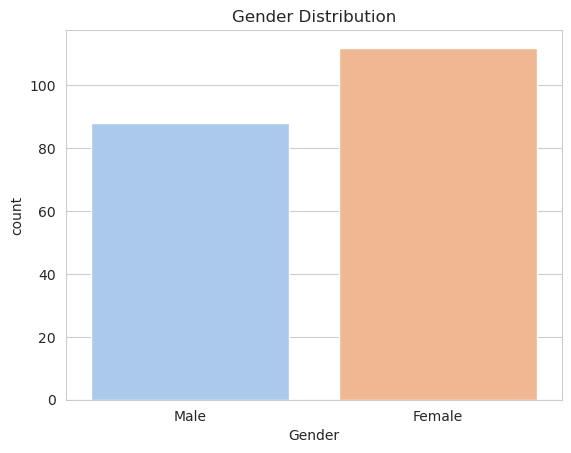

In [11]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

### Age Distribution


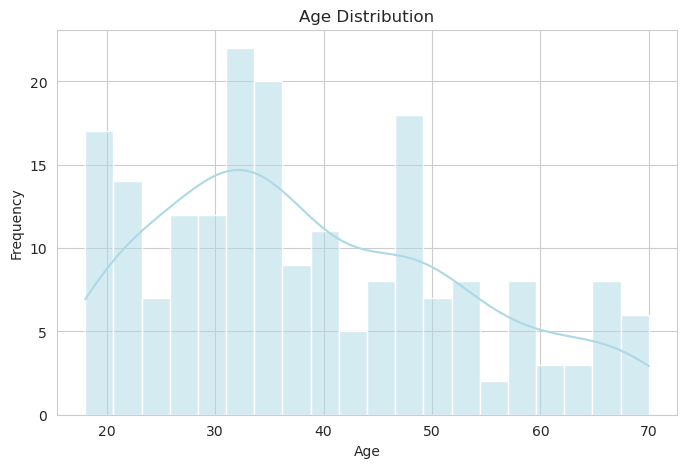

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='lightblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Annual Income Distribution


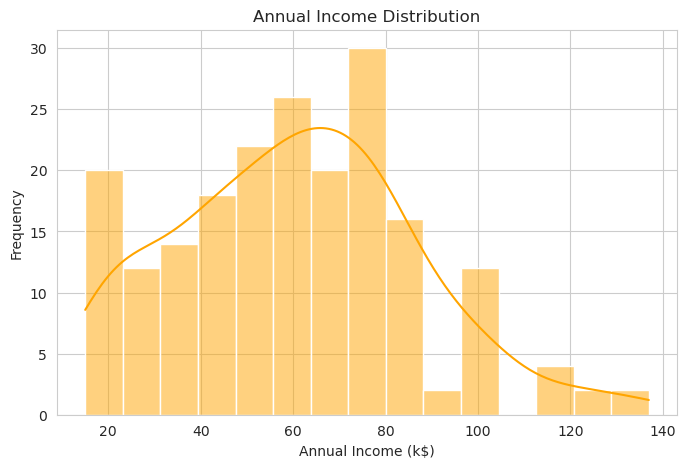

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.show()

### Spending Score Distribution


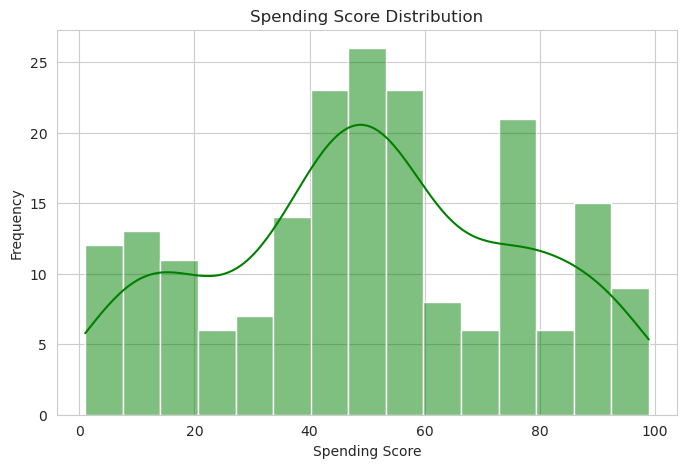

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.show()

### Relationships Between Features


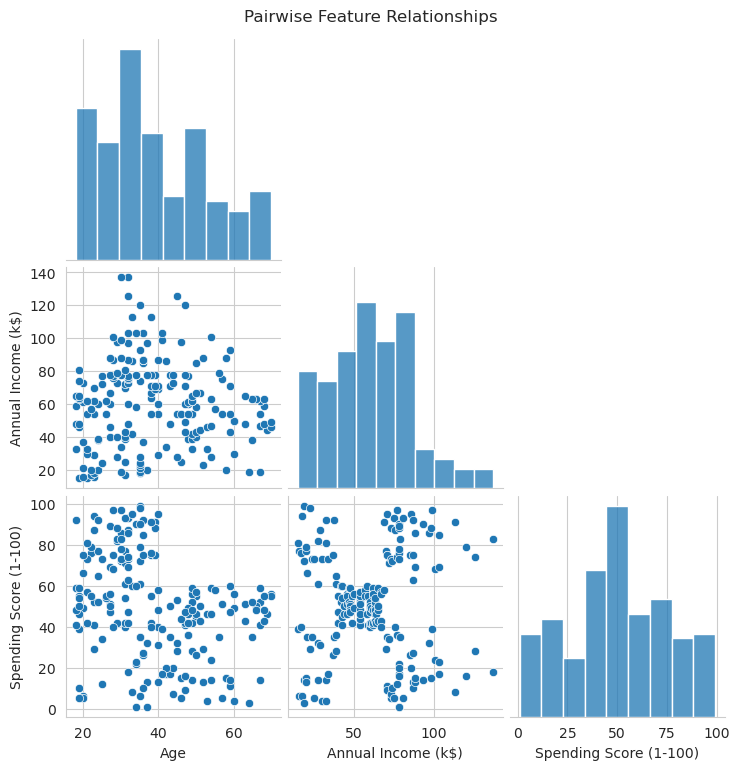

In [15]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

## Feature Selection for Clustering


In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


## Step 4: Elbow Method to Find Optimal Clusters


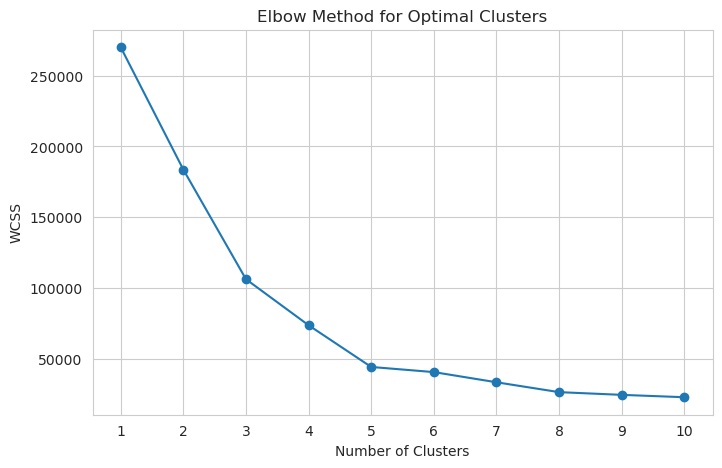

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

## Train KMeans Model


In [18]:
# From the elbow method, we choose k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

## Visualize Clusters


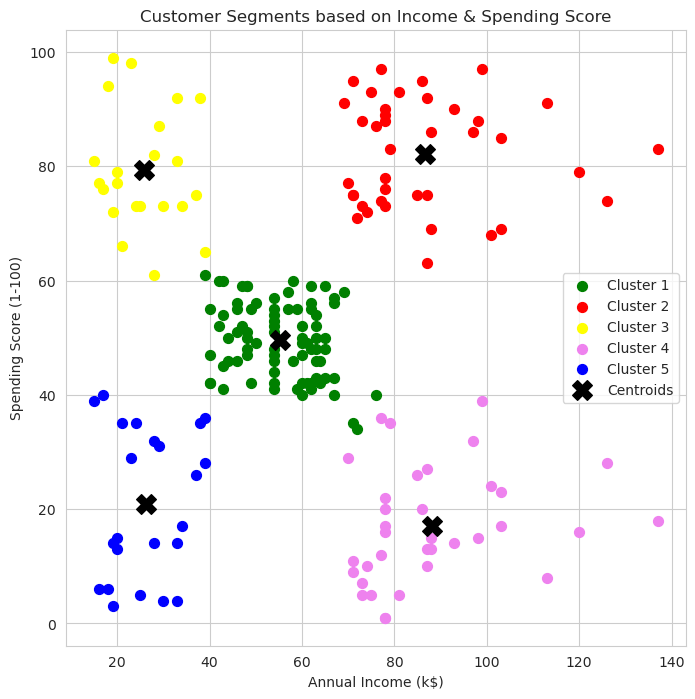

In [19]:
# Plotting the clusters
plt.figure(figsize=(8,8))
colors = ['green', 'red', 'yellow', 'violet', 'blue']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for i in range(5):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, c=colors[i], label=labels[i])

# Centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', marker='X', label='Centroids')

plt.title("Customer Segments based on Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## Final Thoughts

- K-Means grouped the customers into distinct clusters.
- This helps in customer profiling and targeted marketing.
- Additional features like Age and Gender can be explored in future models.

### Ackknowledgement

##### Siddhardhan [YouTube Video](https://youtu.be/SrY0sTJchHE?si=JHYYMA70cdXq29mJ)